<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/ENTREGA_3_%7C%7C_NO_SUPERVISADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importar el dataset
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/CIENCIA DE DATOS/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
data.dropna(subset=['Income'], inplace=True)

In [6]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
#Eliminar
data['ID'].unique()
data.drop(columns=['ID'], inplace=True)

In [8]:
# Calcular la edad de cada usuario y eliminar la columna Year_Birth
data['Age'] = 2024 - data['Year_Birth']

In [9]:
data.drop(columns=['Year_Birth'], inplace=True)

In [10]:
# Convertirlo en valor númerico
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [11]:
# Remplazar los valores objeto a numericos
education_dictionary = {'Graduation': 3, 'PhD': 5, 'Master': 4, 'Basic': 2, '2n Cycle': 1}
data['Education'] = data['Education'].map(education_dictionary)

In [12]:
# Convertirlo en valor númerico
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
Marital_Status_dictionary = {'Single': 1, 'Together': 2, 'Married': 3, 'Divorced': 4, 'Widow': 5,
                        'Alone': 6, 'Absurd': 7, 'YOLO': 8}
data['Marital_Status'] = data['Marital_Status'].map(Marital_Status_dictionary)

In [14]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,3,1,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,0,0,0,0,3,11,1,67
1,3,1,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,0,0,0,0,3,11,0,70
2,3,2,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,0,0,0,0,3,11,0,59
3,3,2,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,0,0,0,0,3,11,0,40
4,5,3,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,0,0,0,0,3,11,0,43


In [15]:
data.describe()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000
mean,3.393953,2.501805,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,55.179603
std,1.124141,1.073378,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554
min,1.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,3.000000,2.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,3.000000,3.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,4.000000,3.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,5.000000,8.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000


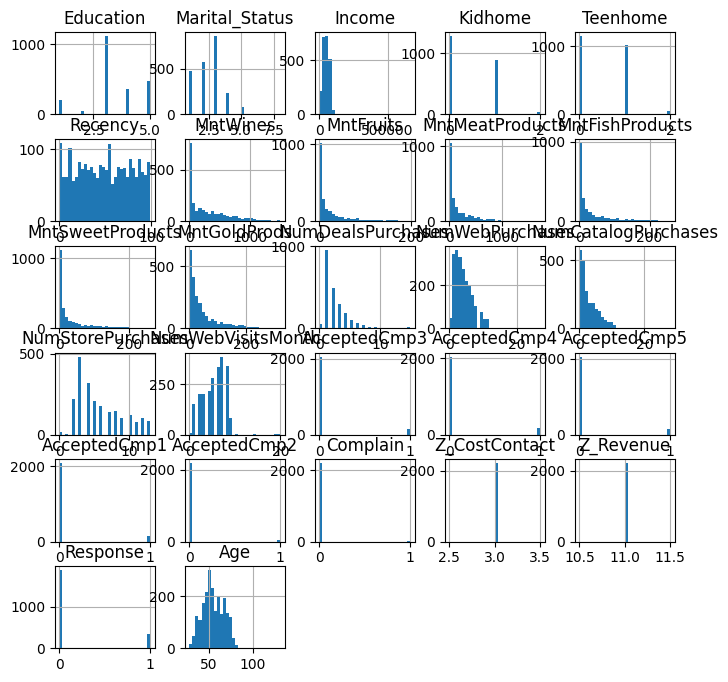

In [16]:
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(8,8))
plt.show()

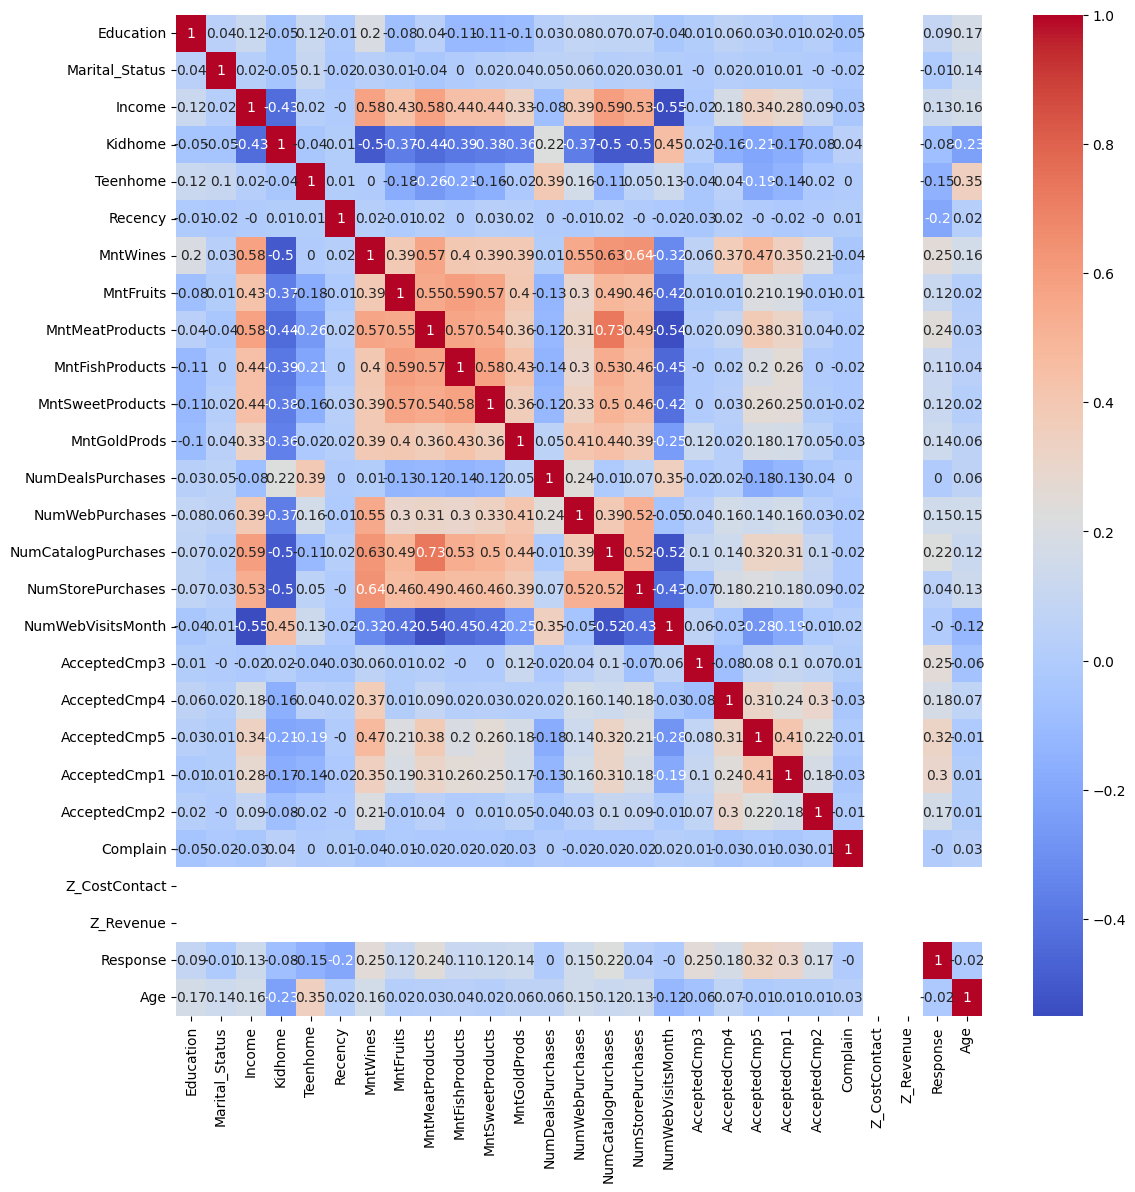

In [17]:
import seaborn as sns

correlation = data.select_dtypes(include=['int64', 'float64']).corr().round(2)

plt.figure(figsize=(13, 13))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   int64  
 1   Marital_Status       2216 non-null   int64  
 2   Income               2216 non-null   float64
 3   Kidhome              2216 non-null   int64  
 4   Teenhome             2216 non-null   int64  
 5   Dt_Customer          2216 non-null   object 
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

In [19]:
data.drop(columns=['Z_CostContact', 'Z_Revenue', 'Marital_Status', 'Recency', 'Complain'], inplace=True)

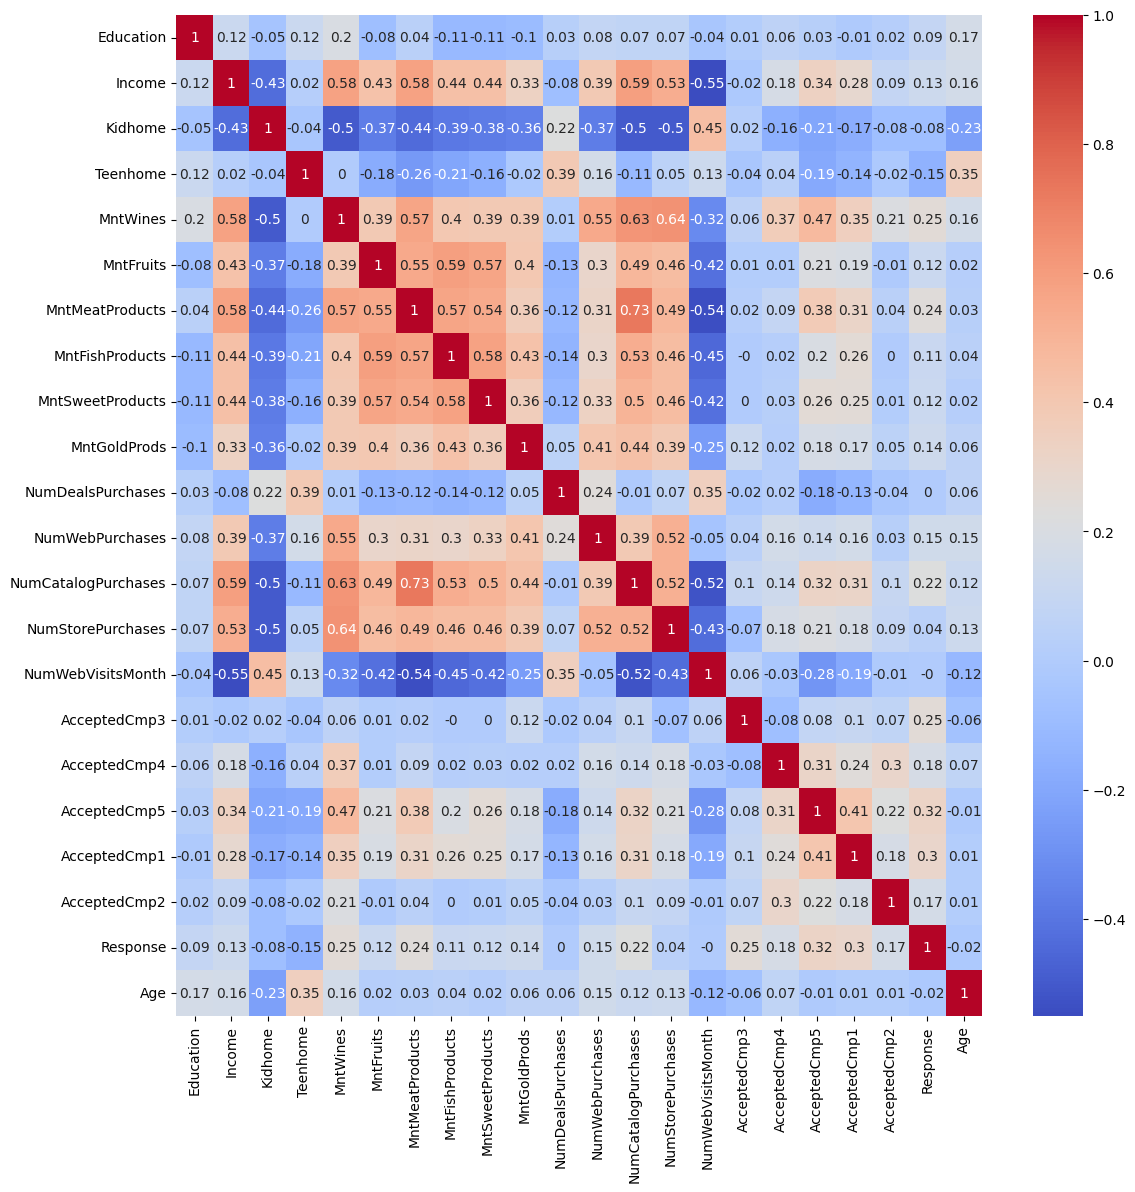

In [20]:
correlation = data.select_dtypes(include=['int64', 'float64']).corr().round(2)

plt.figure(figsize=(13, 13))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [21]:
X_data = data.select_dtypes(include=['int64', 'float64'])
X_data.head()

,Education,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Age
0,3,58138.0,0,0,635,88,546,172,88,88,...,10,4,7,0,0,0,0,0,1,67
1,3,46344.0,1,1,11,1,6,2,1,6,...,1,2,5,0,0,0,0,0,0,70
2,3,71613.0,0,0,426,49,127,111,21,42,...,2,10,4,0,0,0,0,0,0,59
3,3,26646.0,1,0,11,4,20,10,3,5,...,0,4,6,0,0,0,0,0,0,40
4,5,58293.0,1,0,173,43,118,46,27,15,...,3,6,5,0,0,0,0,0,0,43


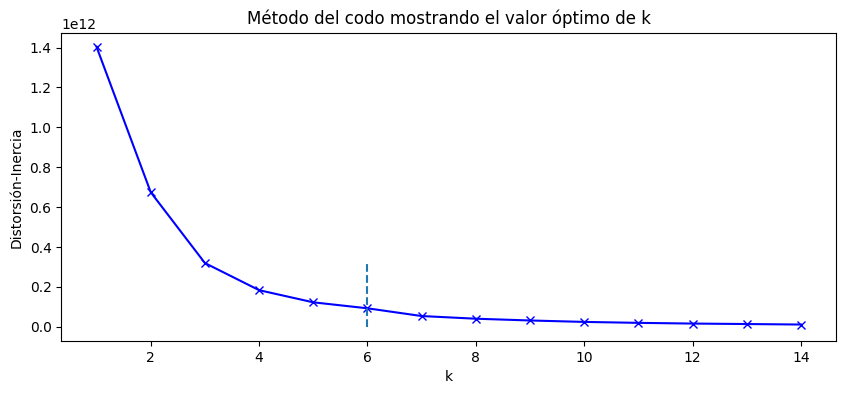

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Asumiendo que 'X_data' es tu DataFrame
# Método del codo - Cada vez que se ejecute este código, el valor de k puede cambiar
distortions = []
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.vlines(x=K[5], ymin=0, ymax=distortions[2], linestyles='--')
plt.xlabel('k')
plt.ylabel('Distorsión-Inercia')
plt.title('Método del codo mostrando el valor óptimo de k')
plt.show()